Let's generate 200 uniformly random datapoints in a rectangle. 

In [20]:
library(spatstat)
library(dplyr)

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

Loading required package: rpart

spatstat 1.52-1       (nickname: 'Apophenia') 
For an introduction to spatstat, type 'beginner' 



In [1]:
n <- 200 
# number of points

In [3]:
# let's set the range
xmin <- 0
xmax <- 1

ymin <- 0
ymax <- 2

In [4]:
# create a uniform sample distribution
x <- runif(n, 0, 1)
y <- runif(n, 0, 2)

In [9]:
head(x)

[1] 0.9711304 0.8956338 0.9609014 0.8690984 0.5899851 0.1505983

In [10]:
head(y)

[1] 1.21268616 1.68308530 0.17239578 0.06931592 0.11431501 0.93081403

When plotting spatial data, make sure the one X unit is the same size as one Y unit. We don't want any misrepresentation. The Y axis scale to X axis scale is called the aspect ratio. Spatial data should be represented with an aspect ratio of 1:1. 

In [12]:
ls.str() # show me previously assigned variables. 

n :  num 200
x :  num [1:200] 0.971 0.896 0.961 0.869 0.59 ...
xmax :  num 1
xmin :  num 0
y :  num [1:200] 1.2127 1.6831 0.1724 0.0693 0.1143 ...
ymax :  num 2
ymin :  num 0

In [13]:
mapxy <- function(a = NA){
    plot(x, y, asp = a)
    rect(xmin, ymin, xmax, ymax)
}

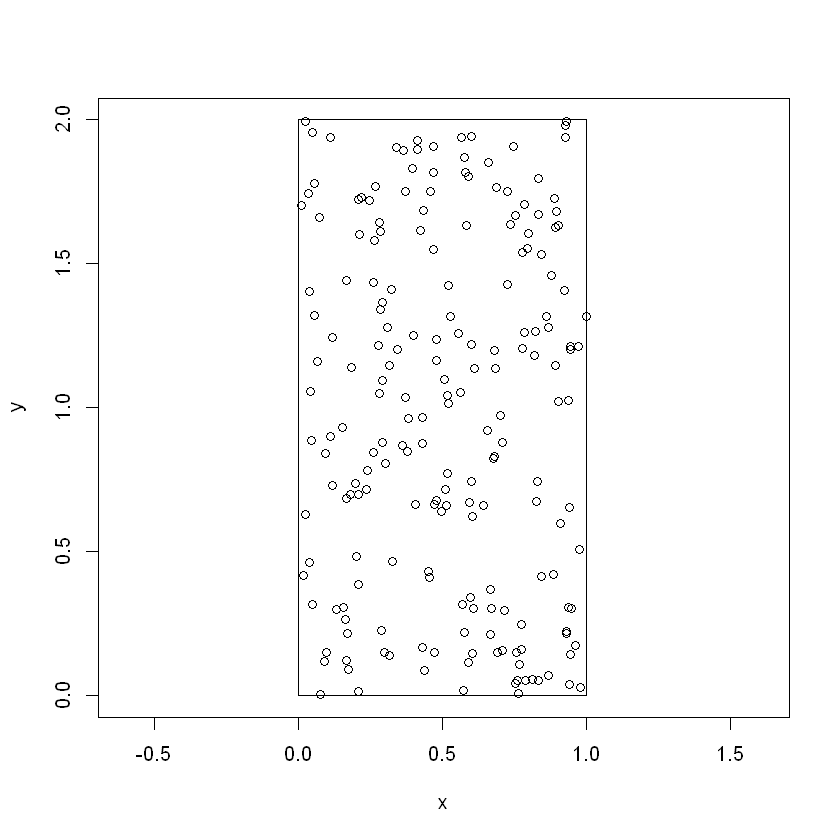

In [14]:
mapxy(1) # aspect ratio = 1

Now let's create a uniform density pattern inside a circle. The spatstat libary contains the disc() function that creates a circular window for you

In [22]:
n_points <- 300
radius <- 10

In [24]:
rSquared <- runif(n_points, 0, radius^2)

In [26]:
head(rSquared)

[1] 33.015344 50.102155 13.868969  2.685183 75.854116 71.181368

In [27]:
angle <- runif(n_points, 0, 2*pi)

In [28]:
head(angle)

[1] 2.469573 5.756448 3.959735 5.198588 4.812439 3.423647

In [29]:
x <- sqrt(rSquared) * cos(angle)

In [30]:
head(x)

[1] -4.4965449  6.1188384 -2.5457192  0.7656906  0.8699293 -8.1035265

In [31]:
y <- sqrt(rSquared) * sin(angle)

In [32]:
head(y)

[1]  3.577210 -3.558366 -2.718140 -1.448758 -8.665872 -2.348239

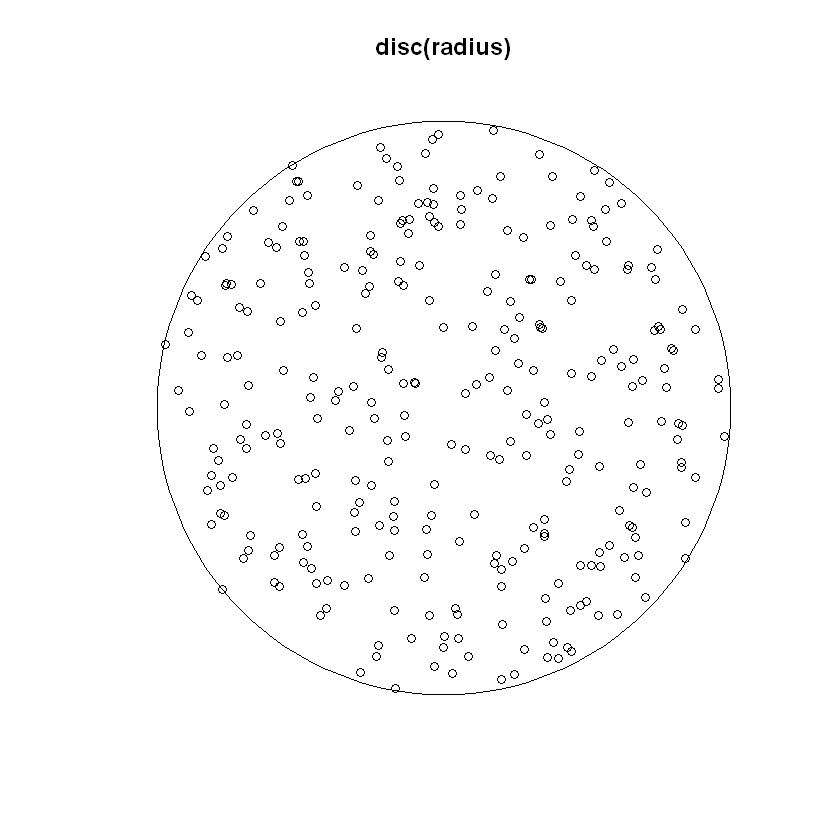

In [34]:
plot(disc(radius))
points(x, y)

- Point = location in a planar space (x, y)
- Event = observed data point

For example: trees can be in any point but the actual locations are considered events. 

Spatial studies occur in a confined area called a "window". Events occcuring outside the "window" are considered unobserved. Spatial point pattern is a set of observed events and the window. Spatial point process is a random number generator for events in a window. Most spatial pattern analysis is spent making inferences about the spatial point process. 

- Marks = other characteristics (height, width, species, etc) about the events. Also called a "Mark Point Pattern".

spatstats stores information in its ppp object (planar point pattern). PPPs contain the (x, y) coords, the window, the marks (optional). 

- Complete Spatial Randomness (CSR) = This just means that no part of the window is any more special than another. And the chance of finding an event somewhere is the same as another location. 

Testing a hypothesis would be interesting for a scientist since rejecting the hypothesis might show that some parts of the forest are producing more trees than others or trees are clumping together or spacing themselves out. The spatstat library has a bunch of tests:

- The Quadrat Test = It can be used to check if the points are completely spatially random. The window is divided into parts (~20 squares) and the number of points in each square are counted. If the process is completely spatially random, then the number of points in the subregions follows a poisson distribution (a simple distribution for counting). The difference between the observed counts and the expected counts lead to a test statistic with a "chi squared" distribution. Larger/smaller values of the test statistic indicate the deviation from complete spatial randomness.

### Create PPP objects and perform a Quadrat Test